In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
data=pd.read_csv("news_last.csv")
len(data)

10929

In [4]:
text=data['Content']

In [5]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Source,ID,Title,Publication,NewslineID,NewsOutletID,Author,Publishtime,OutletName,Content,ArticleURL,Common_Ent.append,LDA
0,0,0,0,SQLdatabase,672,Yemen: Sunni Strongholds Closer Than Ever to F...,No Info,119,308,No Info,10/28/15 0:00,Breitbart News,by Frances Martel 27 Oct 2015 0 With the Shiit...,./src/html/crawl1_2015-10-28/Yemen/Yemen Sunni...,"[('Yemen', 12), ('Houthi', 8), ('Al Qaeda', 5)...","['killed', 'aden', 'aden', 'aden', 'time', 'co..."
1,1,1,1,SQLdatabase,745,Yemen: Coalition Airstrikes Hit Hospital,No Info,119,404,No Info,10/28/15 0:00,Thomson Reuters Foundation,Yemen: Coalition Airstrikes Hit Hospital Human...,./src/html/crawl1_2015-10-28/Yemen/Yemen Coali...,"[('Yemen', 9), ('Human Rights Watch', 5), ('Sa...","['attack', 'said', 'facility', 'hospital', 'ho..."
2,2,2,2,SQLdatabase,1077,Yemen: attack on MSF hospital may be a war crime,No Info,119,534,No Info,10/28/15 0:00,Amnesty International UK,Yemen: attack on MSF hospital may be a war cri...,./src/html/crawl1_2015-10-28/Yemen/Yemen attac...,"[('Yemen', 13), ('Saudi Arabia', 11), ('UK', 8...","['appalling', 'hospital', 'uk', 'msf', 'crime'..."
3,3,3,3,SQLdatabase,1822,Civilians among scores of dead in Yemens Taiz,No Info,119,427,No Info,10/28/15 0:00,MWC News,View Comments At least seven civilians more th...,./src/html/crawl1_2015-10-28/Yemen/Civilians a...,"[('Houthi', 4), ('Aden', 4), ('At least seven'...","['abdullah', 'abdullah', 'abdullah', 'abdullah..."
4,4,4,4,SQLdatabase,2005,Scores dead in Yemens Taiz,No Info,119,146,No Info,10/28/15 0:00,News24,Scores dead in Yemens Taiz 2015-10-27 05:19 (A...,./src/html/crawl1_2015-10-28/Yemen/Scores dead...,"[('Aden', 4), ('Houthi', 3), ('AP', 2), ('Yeme...","['air', 'fighter', 'abd', 'abd', 'pro', 'abd',..."


# TF-IDF with Kmeans
Based on this article: https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans

50 clusters


In [6]:
LDA=data['LDA']

In [54]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features =60,
    stop_words = 'english'
)
tfidf.fit(LDA)
text = tfidf.transform(data['Content'])

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters


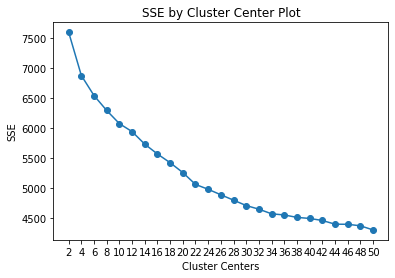

In [55]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 50)

In [56]:
clusters = MiniBatchKMeans(n_clusters=50, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

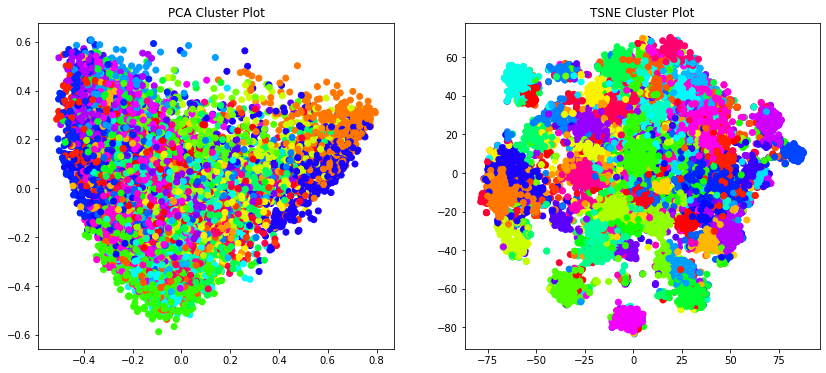

In [57]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=10929, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=10929, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [58]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
gun,obama,time,mateen,attack,police,killed,said,people,shooting

Cluster 1
armed,president,area,state,attack,year,said,people,killed,police

Cluster 2
according,people,case,attorney,new,state,president,said,court,trump

Cluster 3
year,president,city,attack,police,killed,people,state,said,group

Cluster 4
say,american,time,president,new,people,clinton,said,campaign,trump

Cluster 5
day,trump,american,country,time,people,president,year,said,new

Cluster 6
death,killed,according,black,attorney,gun,shooting,said,police,officer

Cluster 7
court,new,people,family,death,year,according,police,said,child

Cluster 8
obama,trump,year,new,time,state,people,country,said,president

Cluster 9
action,group,armed,say,said,day,new,year,people,time

Cluster 10
time,state,people,new,obama,said,president,campaign,trump,clinton

Cluster 11
attorney,police,new,year,state,according,time,case,said,court

Cluster 12
according,court,state,killed,year,family,people,police,said,death

Cluster 13
year,am

# 100 clusters


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters
Fit 52 clusters
Fit 54 clusters
Fit 56 clusters
Fit 58 clusters
Fit 60 clusters
Fit 62 clusters
Fit 64 clusters
Fit 66 clusters
Fit 68 clusters
Fit 70 clusters
Fit 72 clusters
Fit 74 clusters
Fit 76 clusters
Fit 78 clusters
Fit 80 clusters
Fit 82 clusters
Fit 84 clusters
Fit 86 clusters
Fit 88 clusters
Fit 90 clusters
Fit 92 clusters
Fit 94 clusters
Fit 96 clusters
Fit 98 clusters
Fit 100 clusters


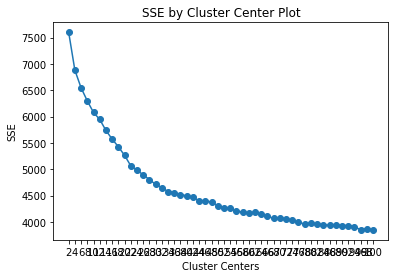

In [59]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 100)

In [60]:
clusters = MiniBatchKMeans(n_clusters=100, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

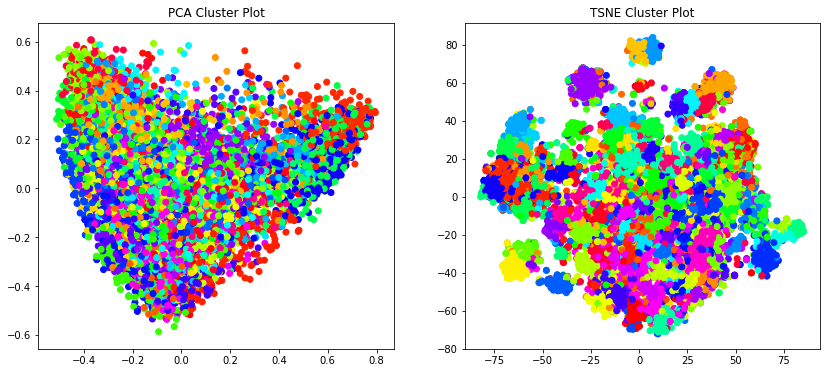

In [61]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=10929, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=10929, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [14]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
attacks,conclusions,coordination,criticism,belgium,belgian,flint,eu,brussels,kerry

Cluster 1
michel,level,said,abdeslam,alert,belgium,attacks,belgian,paris,brussels

Cluster 2
agents,enforcement,said,undocumented,sanctuary,deportation,trump,immigrants,ice,immigration

Cluster 3
says,woman,said,sex,men,assault,violence,rape,sexual,women

Cluster 4
black,minnesota,paul,officer,yanez,philando,reynolds,st,police,castile

Cluster 5
gulen,isis,erdoğan,said,ankara,erdogan,istanbul,coup,turkish,turkey

Cluster 6
mps,said,parliament,birstall,britain,labour,mair,mp,jo,cox

Cluster 7
county,firefighters,angeles,residents,structures,flash,evacuation,road,sand,canyon

Cluster 8
attack,said,regime,weapons,trump,russia,syrian,syria,chemical,assad

Cluster 9
assault,shooting,obama,weapons,ar,rifle,guns,mass,orlando,gun

Cluster 10
trump,resolution,syria,exposure,symptoms,said,sarin,haley,assad,chemical

Cluster 11
yelled,mad,seats,taking,tunnel,hospital,allegedly,path,train,passenger

Clus

# TF-IDF with DBSCAN

In [18]:
from sklearn.cluster import DBSCAN

In [25]:
#eps =0.6
db = DBSCAN(eps=0.6, min_samples=10).fit(text) 
core_samples_mask = np.zeros_like(db.labels_) 
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 

In [26]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 


In [27]:
label=pd.Series(labels)
label.value_counts() 
# most all data is -1, so don't need to plot 

-1    10894
 0       24
 1       11
dtype: int64

In [29]:
#eps =1.0
db = DBSCAN(eps=1, min_samples=10).fit(text) 
core_samples_mask = np.zeros_like(db.labels_) 
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 

In [30]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 


In [31]:
label=pd.Series(labels)
label.value_counts()

-1     6552
 42     407
 8      388
 6      333
 0      293
       ... 
 23      10
 60      10
 48      10
 83      10
 35       9
Length: 90, dtype: int64

# Topic distribution


In [42]:
topicSet=[]
for i in data['LDA']:
    for j in (i.split(',')):
        topicSet.append(j)

In [43]:
topicSet=pd.Series(topicSet)

In [49]:
topicSet.value_counts()[:15]

 'said'         8332
 'attack'       7414
 'police'       5958
 'according'    4287
 'trump'        3575
 'people'       2571
 'also'         2519
 'u'            1941
 'black'        1913
 'american'     1872
 'officer'      1867
 'airport'      1836
 'arrested'     1801
 'gun'          1679
 'city'         1600
dtype: int64

 'said'          8332
 'attack'        7414
 'police'        5958
 'according'     4287
 'trump'         3575
                 ... 
 'expanded']        1
 'flimsy'           1
 'provoke'          1
['flourished'       1
 'countering'       1
Length: 18857, dtype: int64